Using the Tuberculosis (TB) Chest X-ray Database

### Import Libraries

In [55]:
import numpy as np 
import pandas as pd 
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
from tqdm import tqdm

### Mount the google drive

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [19]:
# Define path to the data directory
data_dir = Path('/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database')

data_dir

PosixPath('/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database')

In [21]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = data_dir / '/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Normal'
Tuberculosis_cases_dir = data_dir / '/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Tuberculosis'

In [22]:
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

In [25]:
# Convert generator to list
normal_cases_list = list(normal_cases)
Tuberculosis_cases_list = list(Tuberculosis_cases)

print(len(normal_cases_list))
print(len(Tuberculosis_cases_list))


3500
700


In [40]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = data_dir / '/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Normal'
Tuberculosis_cases_dir = data_dir / '/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,/content/drive/MyDrive/archive (1)/TB_Chest_Ra...,0
1,/content/drive/MyDrive/archive (1)/TB_Chest_Ra...,0
2,/content/drive/MyDrive/archive (1)/TB_Chest_Ra...,0
3,/content/drive/MyDrive/archive (1)/TB_Chest_Ra...,0
4,/content/drive/MyDrive/archive (1)/TB_Chest_Ra...,0


In [41]:
train_data.shape


(4200, 2)

In [42]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

0    3500
1     700
Name: label, dtype: int64


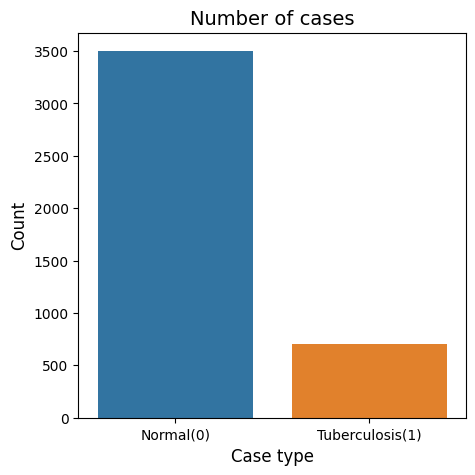

In [47]:
# Plot the results 
plt.figure(figsize=(5,5))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

In [52]:
# Get few samples for both the classes
Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

In [53]:
# Concat the data in a single list and del the above two list
samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

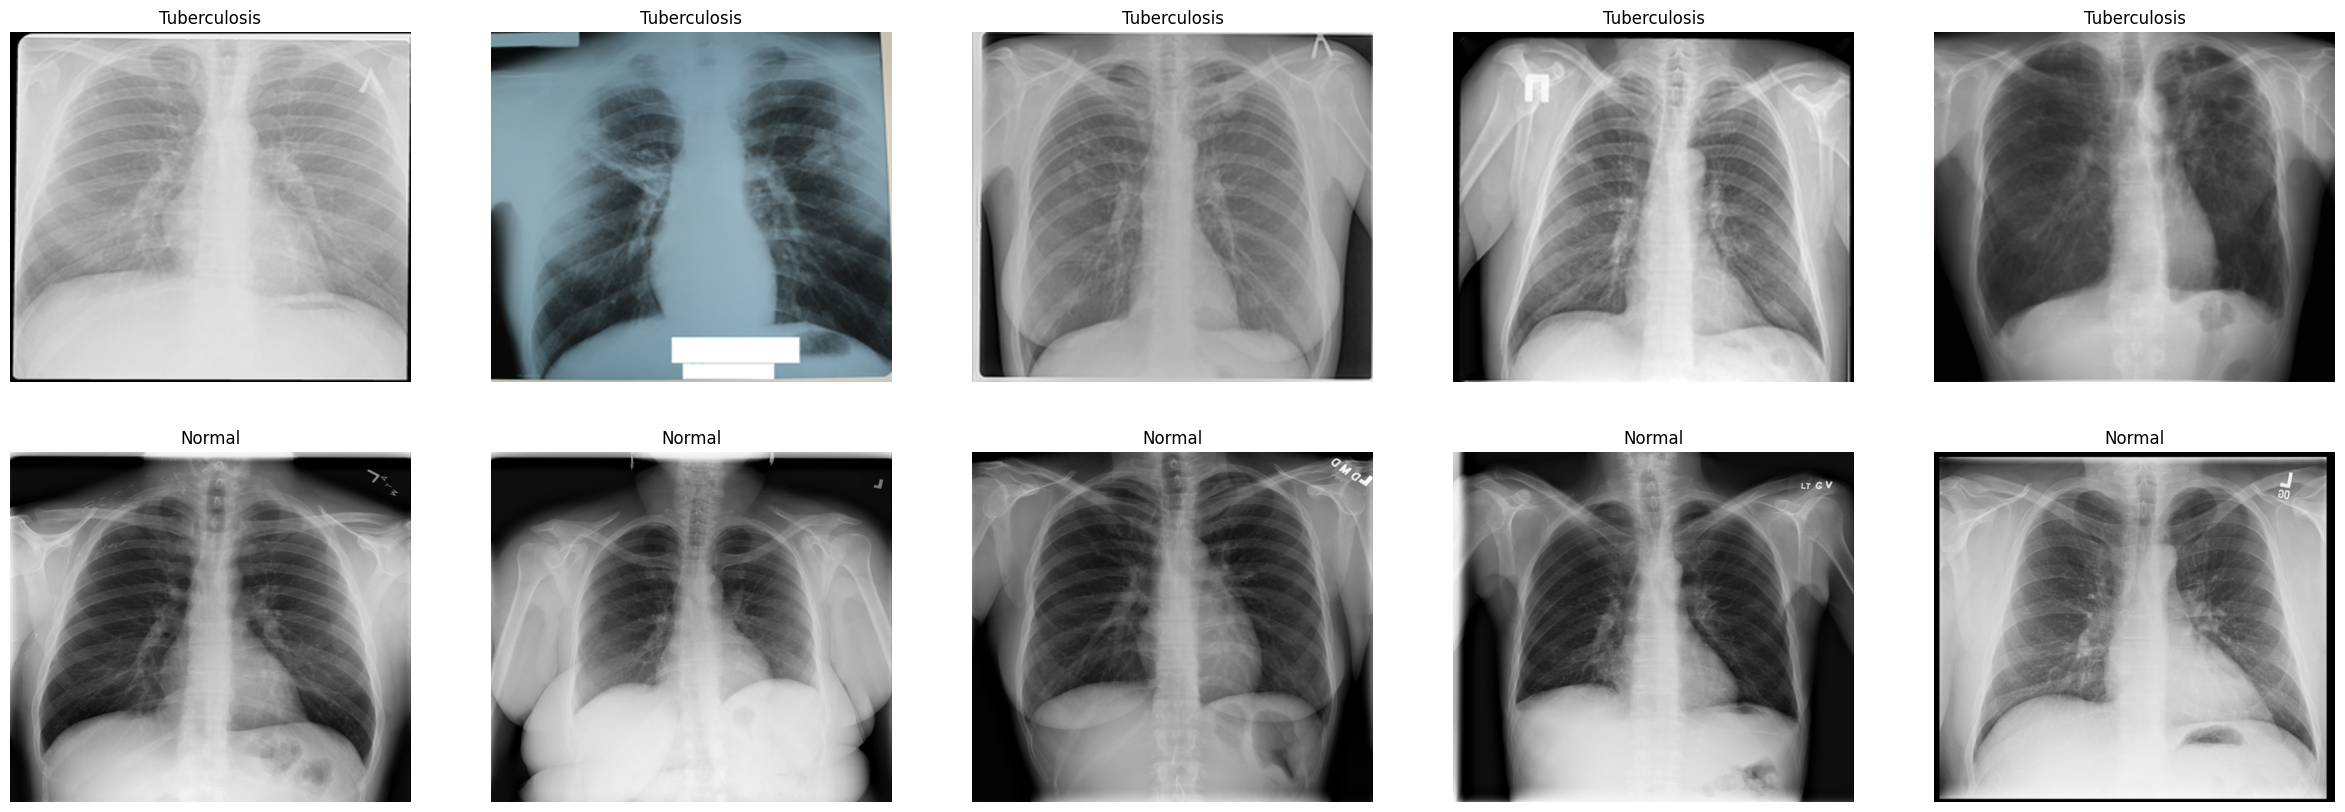

In [54]:
# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [58]:
from tqdm import tqdm
train_normal = data_dir / '/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Normal'
train_Tuberculosis = data_dir / '/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical



for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                      
# Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

3500it [00:35, 99.49it/s] 
700it [00:06, 111.96it/s]

Total number of validation examples:  (4200, 28, 28, 3)
Total number of labels: (4200,)


In [59]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        ...,
        [0.09019608, 0.09019608, 0.09019608],
        [0.04705882, 0.04705882, 0.04705882],
        [0.        , 0.        , 0.        ]],

       [[0.02745098, 0.02745098, 0.02745098],
        [0.35686275, 0.35686275, 0.35686275],
        [0.58431373, 0.58431373, 0.58431373],
        ...,
        [0.41960784, 0.41960784, 0.41960784],
        [0.45490196, 0.45490196, 0.45490196],
        [0.16470588, 0.16470588, 0.16470588]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.27843137, 0

In [60]:
train_labels1.shape

(4200,)

In [61]:
train_data1.shape

(4200, 28, 28, 3)

In [62]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [63]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()

array([0, 1])

In [64]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    3500
1    3500
Name: label, dtype: int64


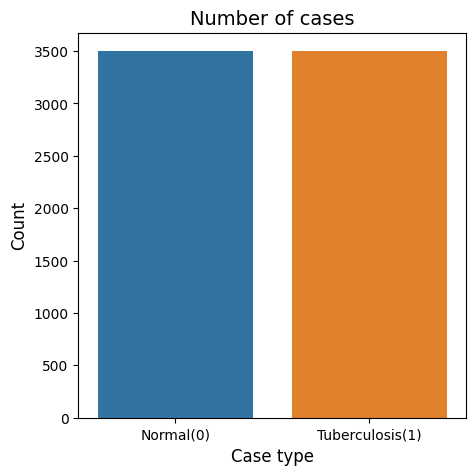

In [66]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(5,5))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

In [67]:
train_data2.shape

(7000, 2352)

In [68]:
train_labels2.shape

(7000, 1)

In [69]:
train_labels2

,label
0,0
1,0
2,0
3,0
4,0
...,...
6995,1
6996,1
6997,1
6998,1


In [70]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.13, random_state=42)

In [72]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [73]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [74]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/10
191/191 [==============================] - 9s 32ms/step - loss: 0.3280 - accuracy: 0.8516 - val_loss: 0.1551 - val_accuracy: 0.9429
Epoch 2/10
191/191 [==============================] - 8s 44ms/step - loss: 0.1930 - accuracy: 0.9235 - val_loss: 0.1241 - val_accuracy: 0.9538
Epoch 3/10
191/191 [==============================] - 6s 30ms/step - loss: 0.1687 - accuracy: 0.9317 - val_loss: 0.1114 - val_accuracy: 0.9604
Epoch 4/10
191/191 [==============================] - 7s 36ms/step - loss: 0.1502 - accuracy: 0.9437 - val_loss: 0.1739 - val_accuracy: 0.9319
Epoch 5/10
191/191 [==============================] - 6s 30ms/step - loss: 0.1228 - accuracy: 0.9586 - val_loss: 0.1009 - val_accuracy: 0.9681
Epoch 6/10
191/191 [==============================] - 7s 36ms/step - loss: 0.2006 - accuracy: 0.9258 - val_loss: 0.3229 - val_accuracy: 0.8714
Epoch 7/10
191/191 [==============================] - 6s 30ms/step - loss: 0.1658 - accuracy: 0.9366 - val_loss: 0.1159 - val_accuracy: 0.9571

In [76]:
train_labels2['label'].unique()


array([0, 1])

In [78]:
test_data = []
image='/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-101.png'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [79]:
test_data1.shape

(1, 28, 28, 3)

In [80]:
a=model.predict(np.array(test_data1))
a

1/1 [==============================] - 0s 110ms/step


array([[-3.008836 ,  1.9160068]], dtype=float32)

In [81]:
np.argmax(a)

1

In [82]:
model.save('my_model1')

In [83]:
new_model = tf.keras.models.load_model('./my_model1')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [84]:
a=new_model.predict(np.array(test_data1))
a

1/1 [==============================] - 0s 96ms/step


array([[-3.008836 ,  1.9160068]], dtype=float32)

In [85]:
image='/content/drive/MyDrive/archive (1)/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png'
img = cv2.imread(str(image))

In [86]:
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open(image) 
  
# save a image using extension
im1 = im1.save("tb1.jpg")

In [87]:
import shutil

# The model is saved in the 'my_model1' directory
shutil.move("my_model1", "/content/my_model1")


In [ ]:
!pip install tensorflowjs


In [8]:
import tensorflow as tf
import tensorflowjs as tfjs

# the SavedModel is saved in the 'my_model1' directory
saved_model_dir = "/content/my_model1"

# Load the SavedModel using TensorFlow
loaded_model = tf.keras.models.load_model(saved_model_dir)

# Convert and save the model in TensorFlow.js format
tfjs.converters.save_keras_model(loaded_model, "/content/drive/MyDrive/Colab Notebooks/tfjs_model")

# The converted model will be saved in the '/content/tfjs_model' directory
